<a href="https://colab.research.google.com/github/opakaj/Deep-Learning/blob/main/Boston_data_with_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
 (x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

In [7]:
x_train


array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [ ]:
tf.random.set_seed(42)

boston_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

boston_model.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.SGD(),
                     metrics=["mae"])

boston_model.fit(x_train,y_train, epochs=100)

In [11]:
 (x_train, y_train), (x_test, y_test)

((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

In [46]:
x_train.shape

(404, 13)

In [45]:
tf.expand_dims(y_train,axis=-1).shape

TensorShape([404, 1])

In [33]:
tf.random.set_seed(42)

boston_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

boston_model.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["mae"])

history = boston_model.fit(x_train,y_train, epochs=400, verbose=0)

In [34]:
boston_model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 3.1987 - mae: 3.1987


[3.1986966133117676, 3.1986966133117676]

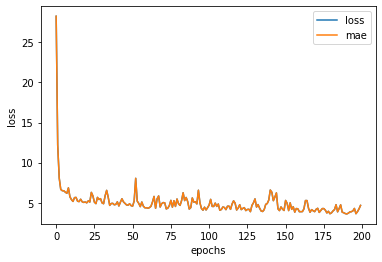

In [32]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [35]:
# Evaluate the model trained for 200 total epochs
boston_model_2_loss, boston_model_2_mae = boston_model.evaluate(x_test, y_test)
boston_model_2_loss, boston_model_2_mae

4/4 [==============================] - 0s 5ms/step - loss: 3.1987 - mae: 3.1987


(3.1986966133117676, 3.1986966133117676)

In [38]:
y_preds = boston_model.predict(x_test)

In [50]:
# Save a model using the SavedModel format
boston_model.save('boston_model_SavedModel_format')

INFO:tensorflow:Assets written to: boston_model_SavedModel_format/assets


In [51]:
!ls boston_model_SavedModel_format

assets	keras_metadata.pb  saved_model.pb  variables


In [53]:
# Save a model using the HDF5 format
boston_model.save("boston_model_HDF5_format.h5")

In [54]:
!ls best_model_HDF5_format.h5

ls: cannot access 'best_model_HDF5_format.h5': No such file or directory


In [55]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("boston_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 100)               1400      
                                                                 
 dense_37 (Dense)            (None, 10)                1010      
                                                                 
 dense_38 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,421
Trainable params: 2,421
Non-trainable params: 0
_________________________________________________________________


In [57]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

In [58]:
# Compare model_2 with the SavedModel version (should return True)
model_2_preds = boston_model.predict(x_test)
saved_model_preds = loaded_saved_model.predict(x_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

True